#  Parkinson's Freezing of Gait Prediction
A motivação desse trabalho surgiu da competição Parkinson's Freezing of Gait Prediction no kaggle.

O objetivo é identificar o momento do congelamento de marcha em pessoas com mal de Parkinson.

Tipo do problema: classificação

Features utilizadas: Time, AccV, AccML, AccAP, StartHesitation, Turn, Walking, Valid e Task

Output: Classificar cada evento dentro de uma janela deslizante dentre as classes StartHesitation, Turn, Walking, que significam respectivamente, congelamento de marcha no início da caminhada, ao virar-se e durante a caminhada.

link: https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction/overview

## Carregando dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [ ]:
# !pip install tsfresh

In [ ]:
# from tsfresh import extract_features, extract_relevant_features, select_features
# from tsfresh.utilities.dataframe_functions import impute
# from tsfresh.feature_extraction import ComprehensiveFCParameters

In [ ]:
dfs = []
arquivos = [
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/02ea782681.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/06414383cf.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/092b4c1819.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/0c55be4384.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog/0d7ab3a9f9.csv",
            # "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/0a89f859b5.csv"
            "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/6c39f4d317.csv",
            "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/2ea063ca4f.csv"
            ]
for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    dfs.append(df)
df_concatenado = pd.concat(dfs)

In [ ]:
df_concatenado['StartHesitation'].value_counts()

0    64270
1     2437
Name: StartHesitation, dtype: int64

In [ ]:
df_concatenado['Turn'].value_counts()

1    35000
0    31707
Name: Turn, dtype: int64

In [ ]:
df_concatenado['Walking'].value_counts()

0    51542
1    15165
Name: Walking, dtype: int64

In [ ]:
df_concatenado.shape

(66707, 7)

In [ ]:
df_concatenado.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')

In [ ]:
# df = df_concatenado.loc[(df_concatenado['StartHesitation'] == 0) & (df_concatenado['Turn'] == 0) & (df_concatenado['Walking'] == 0) ]

In [ ]:
# index = np.where((df_concatenado['StartHesitation'] == 0) & (df_concatenado['Turn'] == 0) & (df_concatenado['Walking'] == 0))[0]

In [ ]:
# Create a new column with initial values set to 0
df_concatenado['no-FOG'] = 0

# Set the values to 1 for the indexes in the list
for i in df_concatenado.index:
  if (df_concatenado['StartHesitation'].iloc[i] == 0) and (df_concatenado['Turn'].iloc[i] == 0) and (df_concatenado['Walking'].iloc[i] == 0):
    df_concatenado.at[i, 'no-FOG'] = 1

In [ ]:
df_concatenado.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'no-FOG'],
      dtype='object')

### Analisando a distribuição dos dados ao longo do tempo

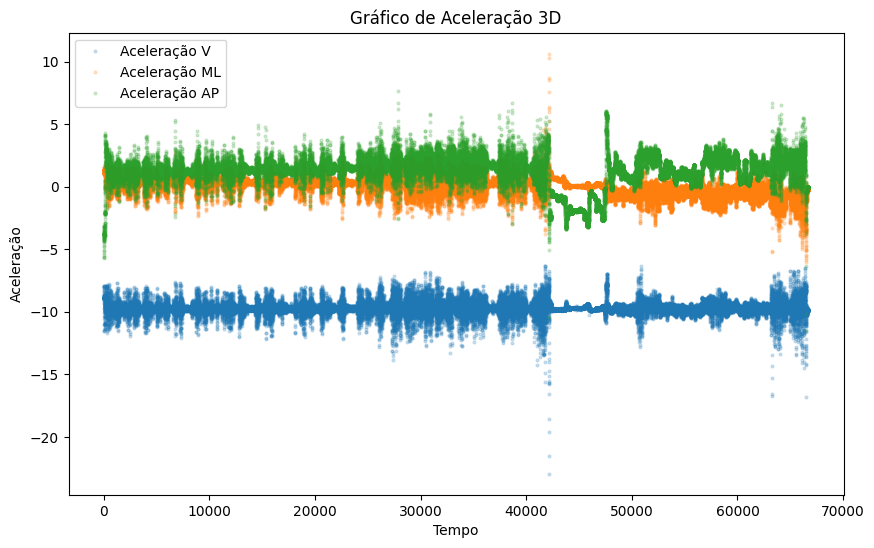

In [ ]:
# Extrair as colunas de interesse do DataFrame
aceleracao_V = df_concatenado['AccV']
aceleracao_ML = df_concatenado['AccML']
aceleracao_AP = df_concatenado['AccAP']
qtd_samples = len(aceleracao_V)

# Plotar o gráfico
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Plota a aceleração em x
plt.plot(range(0,qtd_samples), aceleracao_V, marker='.', alpha=0.2, markersize=4, linestyle='', label='Aceleração V')
# Plota a aceleração em y
plt.plot(range(0,qtd_samples), aceleracao_ML, marker='.', alpha=0.2, markersize=4, linestyle='', label='Aceleração ML')
# Plota a aceleração em z
plt.plot(range(0,qtd_samples), aceleracao_AP, marker='.', alpha=0.2, markersize=4, linestyle='', label='Aceleração AP')

plt.xlabel('Tempo')  # Rótulo do eixo x
plt.ylabel('Aceleração')  # Rótulo do eixo y
plt.title('Gráfico de Aceleração 3D')  # Título do gráfico
plt.legend()  # Mostra a legenda com as labels das linhas

# Exibe o gráfico
plt.show()

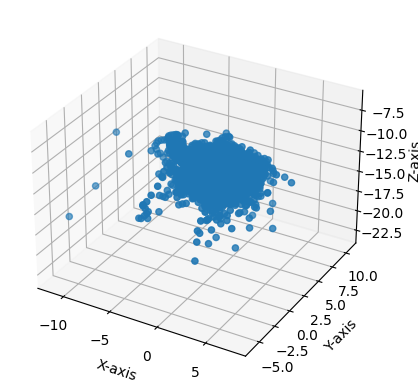

In [ ]:
# Extract X, Y, and Z values from the DataFrame
x_ = df_concatenado['AccAP']
y_ = df_concatenado['AccML']
z_ = df_concatenado['AccV']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_, y_, z_)

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

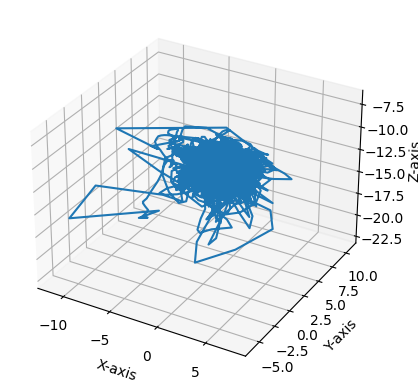

In [ ]:
# Create a 3D line plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x_, y_, z_)

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

## Analisando os dados para cada atividade

### StartHesitation

In [ ]:
import matplotlib.pyplot as plt

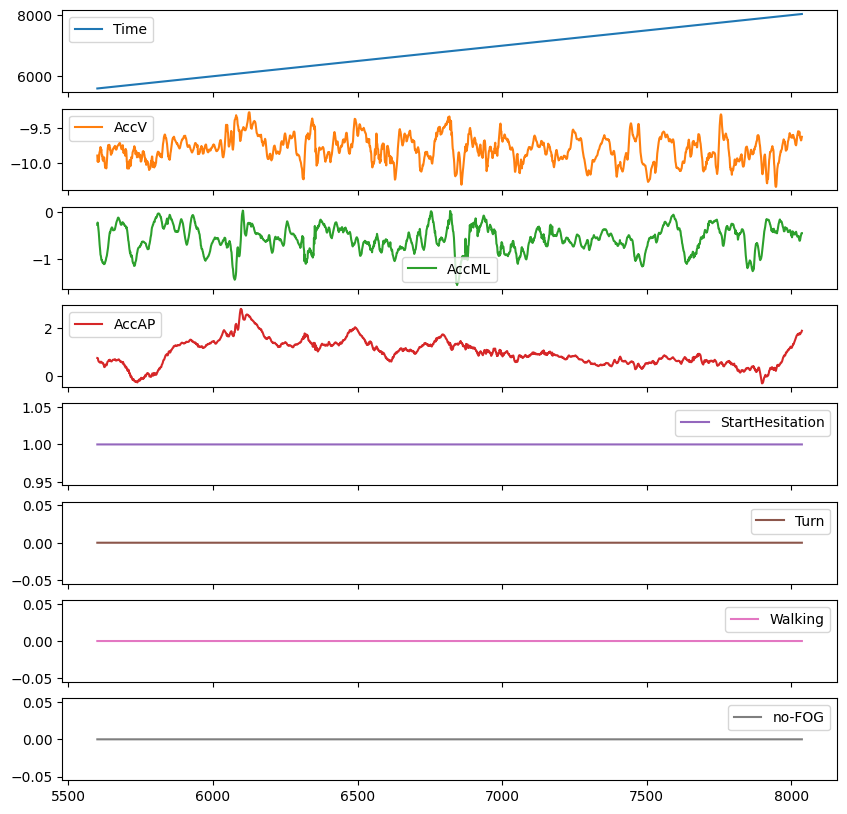

In [ ]:
df_concatenado[df_concatenado['StartHesitation'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

### Turn

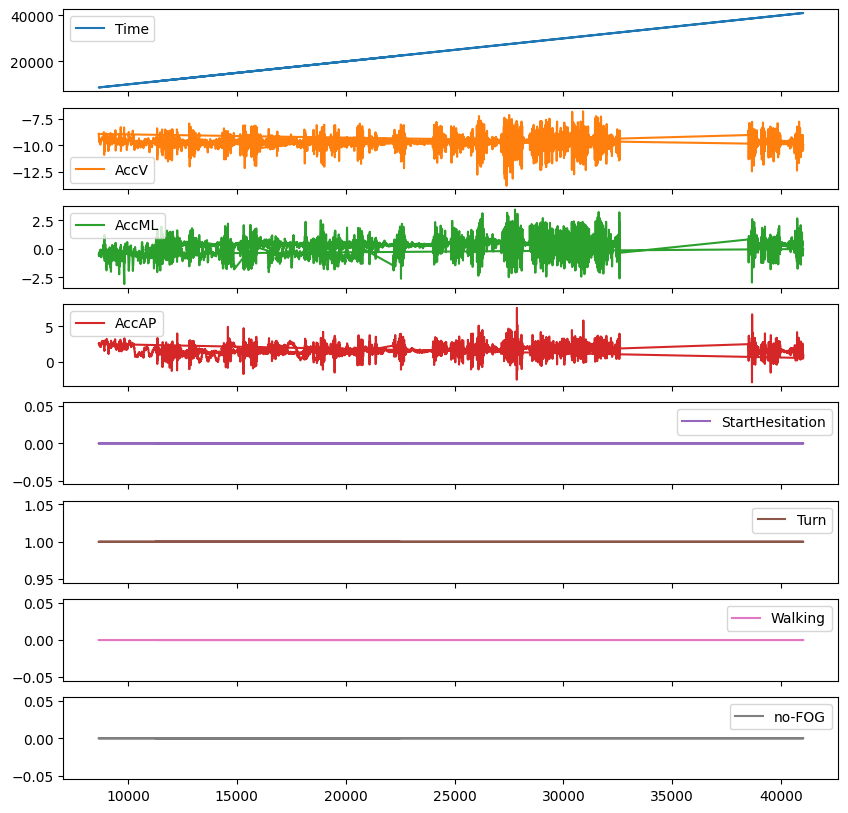

In [ ]:
df_concatenado[df_concatenado['Turn'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

### Walking

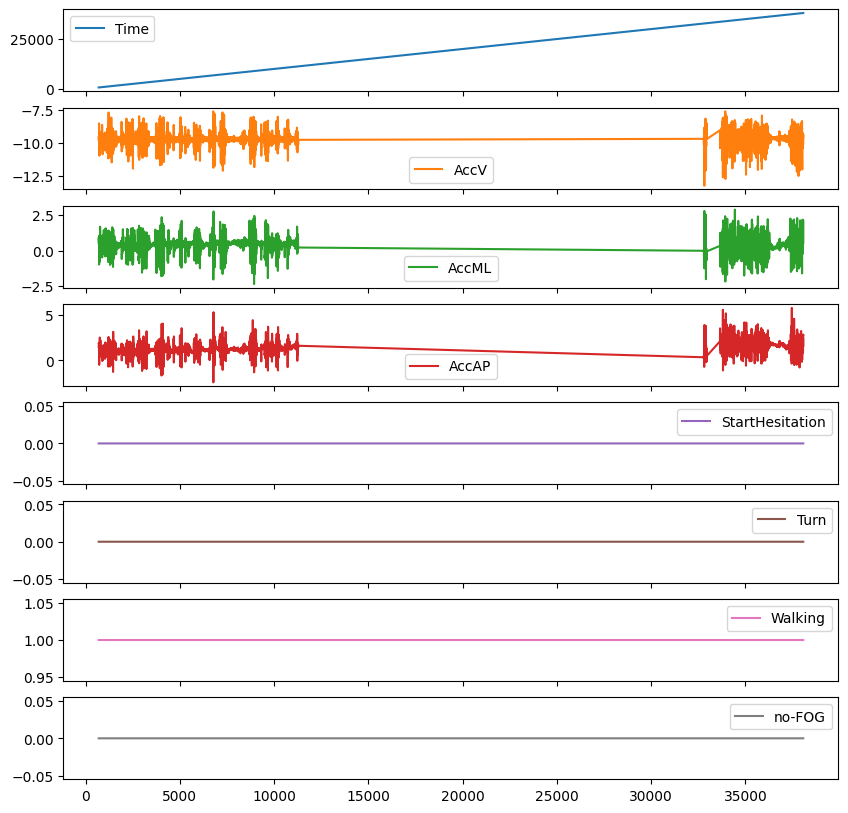

In [ ]:
df_concatenado[df_concatenado['Walking'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

## Correlação dos dados

In [ ]:
start_value_counts = df_concatenado['StartHesitation'].value_counts()
walk_value_counts = df_concatenado['Walking'].value_counts()
turn_value_counts = df_concatenado['Turn'].value_counts()
noFOG_value_counts = df_concatenado['no-FOG'].value_counts()

print("Valores para FOG no inicio da caminhada")
print(start_value_counts)
print("Valores para FOG durante a caminhada")
print(walk_value_counts)
print("Valores para FOG ao mudar de direção")
print(turn_value_counts)
print("Valores para no FOG")
print(noFOG_value_counts)

Valores para FOG no inicio da caminhada
0    64270
1     2437
Name: StartHesitation, dtype: int64
Valores para FOG durante a caminhada
0    51542
1    15165
Name: Walking, dtype: int64
Valores para FOG ao mudar de direção
1    35000
0    31707
Name: Turn, dtype: int64
Valores para no FOG
0    62607
1     4100
Name: no-FOG, dtype: int64


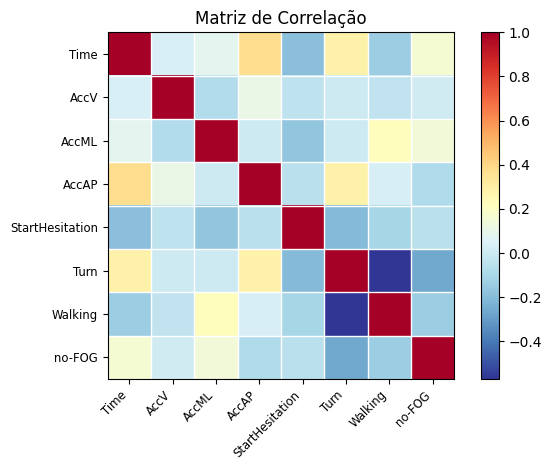

In [ ]:
correlacao = df_concatenado.corr()
#plotar correlação
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

## Separando features e labels

In [ ]:
X = df_concatenado[['AccV','AccML','AccAP']]
y_ = df_concatenado[['StartHesitation','Turn','Walking','no-FOG']]

In [ ]:
y_.iloc[0]

StartHesitation    0
Turn               0
Walking            0
no-FOG             1
Name: 0, dtype: int64

In [ ]:
y_.shape

(66707, 4)

In [ ]:
y_.values

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
y = []
for row in y_.values:
  if row[0]==1:
    y.append(1) #1 = StartHesitation
  elif row[1]==1:
    y.append(2) #2 = Turn
  elif row[2]==1:
    y.append(3) #3 = Walking
  else:
    y.append(0) #0 = no fog

y = pd.DataFrame(y,columns=['label'])

## Dividindo as janelas deslizantes

In [ ]:
# Definir o tamanho da janela deslizante
# window_size = 200

# # Criar janelas deslizantes com metade da sobreposição
# def create_sliding_windows(data, labels, window_size):
#     X = []
#     y = []
#     step_size = window_size // 2
#     for i in range(0, len(data) - window_size + 1, step_size):
#         window = data.iloc[i : i+window_size]
#         label = labels['label'].iloc[i+window_size]
#         X.append(window)
#         y.append(label)
#     return X, pd.Series(y)


In [ ]:
df_concatenado.shape

(66707, 8)

In [ ]:
# Criar janelas deslizantes e rótulos correspondentes
# X, y = create_sliding_windows(df_concatenado, y, window_size)

In [ ]:
y.value_counts()

label
2        35000
3        15165
0        14105
1         2437
dtype: int64

In [ ]:
print(len(X))
print(y.shape)

66707
(66707, 1)


## Separando em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Converter as listas em matrizes numpy
# X = np.array(X)
# y = np.array(y)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## O balanceamento não faz tanto sentido em séries temporais

## ~Balanceando os dados usando a técnica SMOTE~

In [ ]:
# from imblearn.over_sampling import SMOTE
# X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# y_resampled.value_counts(normalize=True)

In [ ]:
# y_resampled = y_resampled.to_numpy()

In [ ]:
# y_resampled = y_resampled.ravel()

In [ ]:
# y_resampled

## Time series generator

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
ts_generator = TimeseriesGenerator(X,y,length=200, batch_size=1, stride=200)

Segundo o chatGPT para driblar o desbalanceamento dos dados podemos seguir as seguintes alternativas:
- Métricas de avaliação adequadas: Utilize métricas de avaliação que sejam robustas em relação ao desequilíbrio das classes em séries temporais, como a área sob a curva ROC (AUC-ROC) ou a média da sensibilidade e especificidade ao longo do tempo.

- Modelos que lidam naturalmente com desequilíbrio: Alguns algoritmos de aprendizado de máquina, como as florestas aleatórias (Random Forests) e os gradient boosting, possuem mecanismos internos para lidar com desequilíbrio de classes de forma mais eficiente.

- Ajuste de pesos das classes: Muitos algoritmos de aprendizado de máquina permitem ajustar pesos para as classes, atribuindo um peso maior à classe minoritária. Isso permite que o modelo dê mais importância para a classe menos representada sem modificar a distribuição dos dados.

## Criando modelos de classificação

Utilizarei os modelos que utilizam diferentes abordagens para encontrar qual se adequa mais ao meu problema

- Random Forest (baseado em árvore)
- Support Vector Machines (SVM) (baseados em vetores de suporte)
- Convolutional Neural Networks (CNN) (baseados em aprendizado profundo)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train.head()

,AccV,AccML,AccAP
12299,-9.830498,-0.520743,0.593859
39260,-9.455542,1.165698,2.483198
13985,-9.793620,-0.569327,0.812580
15572,-9.203775,-0.755828,2.848747
17321,-9.729462,0.480691,1.673613


In [ ]:
X_train

,AccV,AccML,AccAP
12299,-9.830498,-0.520743,0.593859
39260,-9.455542,1.165698,2.483198
13985,-9.793620,-0.569327,0.812580
15572,-9.203775,-0.755828,2.848747
17321,-9.729462,0.480691,1.673613
...,...,...,...
37194,-9.490969,0.453714,1.602637
6265,-9.712080,0.331428,1.241863
12543,-9.757283,-0.602319,0.922703
860,-9.674977,0.175746,0.947454


In [ ]:
scores = []
for i in range(1,7):
  rfc = RandomForestClassifier(max_depth=i, random_state=42)
  rfc.fit(X_train, y_train)
  scores.append(rfc.score(X_test, y_test))

indice_max = scores.index(max(scores))


<ipython-input-83-0bc0abbc5746>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
<ipython-input-83-0bc0abbc5746>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
<ipython-input-83-0bc0abbc5746>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
<ipython-input-83-0bc0abbc5746>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
<ipython-input-83-0bc0abbc5746>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [ ]:
rfc = RandomForestClassifier(max_depth=indice_max, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

<ipython-input-85-823e2bba21ee>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
y_score = rfc.score(X_test, y_test)
print(y_score)

0.6533753060510669


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
acc_rfc = accuracy_score(y_test,y_pred)
print(acc_rfc)

0.6533753060510669


In [ ]:
y_pred

array([0, 2, 2, ..., 2, 2, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63      4247
           1       0.00      0.00      0.00       700
           2       0.62      0.95      0.75     10560
           3       0.70      0.21      0.32      4506

    accuracy                           0.65     20013
   macro avg       0.55      0.41      0.43     20013
weighted avg       0.67      0.65      0.60     20013



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [ ]:
#Importando o algoritmo de SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svc = SVC(gamma="auto")

In [ ]:
y_train = np.ravel(y_train)

In [ ]:
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

acc_rfc = accuracy_score(y_test,y_pred)
print(acc_rfc)

0.6692150102433418


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.52      0.66      4247
           1       0.00      0.00      0.00       700
           2       0.63      0.94      0.76     10560
           3       0.67      0.28      0.39      4506

    accuracy                           0.67     20013
   macro avg       0.55      0.43      0.45     20013
weighted avg       0.68      0.67      0.63     20013



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CNN

In [ ]:
# X_resampled.iloc[0]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Reshape dos dados de entrada para o formato (amostras, comprimento, canais)
# X_resampled = X_resampled.values.reshape((74374, 3, 1))

In [ ]:
# Converter os rótulos para o formato one-hot encoding
# y_resampled = to_categorical(y_resampled, num_classes=4)

In [ ]:
X_test.shape

(20013, 3)

In [ ]:
X_train.shape

(46694, 3)

In [ ]:
y_train.shape

(46694,)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical


# Criar o modelo da CNN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(4,  activation="softmax"))

model.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
            )

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1460/1460 [==============================] - 7s 4ms/step - loss: 0.9152 - accuracy: 0.6115
Epoch 2/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.8340 - accuracy: 0.6446
Epoch 3/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.8237 - accuracy: 0.6484
Epoch 4/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.8196 - accuracy: 0.6528
Epoch 5/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.8158 - accuracy: 0.6548
Epoch 6/10
1460/1460 [==============================] - 3s 2ms/step - loss: 0.8131 - accuracy: 0.6560
Epoch 7/10
1460/1460 [==============================] - 3s 2ms/step - loss: 0.8112 - accuracy: 0.6586
Epoch 8/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.8087 - accuracy: 0.6601
Epoch 9/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.8076 - accuracy: 0.6605
Epoch 10/10
1460/1460 [==============================] - 2s 2ms/step - loss: 0.805

In [ ]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia: {accuracy}")


626/626 [==============================] - 1s 1ms/step - loss: 0.8122 - accuracy: 0.6613
Acurácia: 0.661320149898529


In [ ]:
cnn_pred = model.predict(X_test)

626/626 [==============================] - 1s 1ms/step


In [ ]:
cnn_pred

array([[9.8514789e-01, 2.5237032e-06, 8.5711945e-03, 6.2784879e-03],
       [2.1122108e-01, 8.0109030e-02, 4.7503537e-01, 2.3363444e-01],
       [4.4468757e-02, 1.3463106e-03, 7.0166141e-01, 2.5252354e-01],
       ...,
       [5.1588351e-01, 1.7254556e-03, 4.6139714e-01, 2.0993937e-02],
       [1.0725654e-01, 6.7996876e-07, 5.0202638e-01, 3.9071643e-01],
       [7.5304037e-01, 4.6932171e-04, 2.2532122e-01, 2.1169083e-02]],
      dtype=float32)

## Resultados preliminares

Primeira entrega

- RandomForest: accurácia 0.702399830848927

- SVM: acurária 0.5829368855058674

- CNN: acurária 0.6324135661125183

Segunda entrega

- RandomForest: accurácia 0.6533753060510669

- SVM: acurária 0.6692150102433418

- CNN: acurária 0.661320149898529

## Dificuldades
-  Encontrar csv's dentro do dataset que representem bem as 3 classes: Turn, walking e StartHesitation
- Aplicar a técnica de janela deslizante

## Aprendizados
- Aprendi que a classificação em séries temporais precisam de abordagens diferentes para ser realizada.
- Aprendi mais sobre a importância de dados limpos e organizados
- Aprendi como imputar dados para classes com menos amostras

## Possíveis melhorias futuras
- Aplicar a ténica de janela deslizante
- Utilizar outros tipos de modelos
- Comparar com abordagens utilizadas na literatura